In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Datasets

In [2]:
nfhs=pd.read_csv('/content/drive/My Drive/Constituency/NFHS-5-master/NFHS-5-Districts.csv')

In [3]:
andhra_2014=pd.read_csv('/content/drive/My Drive/Constituency/cluster_2014.csv')
andhra_2019=pd.read_csv('/content/drive/My Drive/Constituency/cluster_2019.csv')
mpi_district=pd.read_csv('/content/drive/My Drive/Constituency/MPI_AP.csv')

# National family health survey

In [4]:
nfhs=nfhs[nfhs['State']=='Andhra Pradesh']

# Electricity rate of districts between 2015 and 2019

<Axes: xlabel='District'>

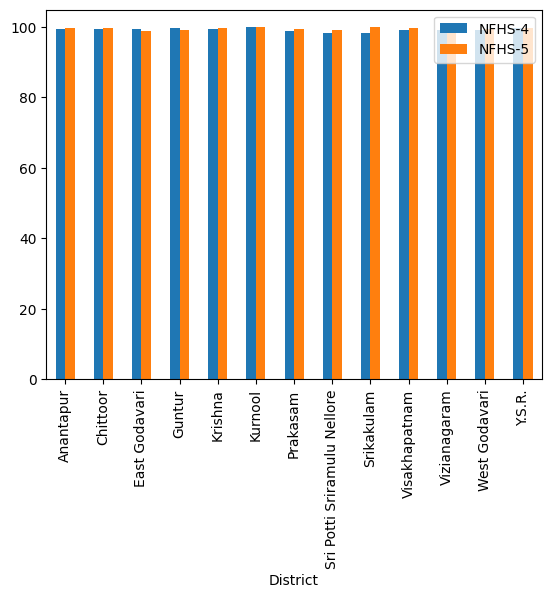

In [5]:
nfhs[nfhs['Indicator']=='7. Population living in households with electricity (%)'].plot(x="District", y=['NFHS-4','NFHS-5'], kind="bar")

# Improved drinking-water source of districts between 2015 and 2019

<Axes: xlabel='District'>

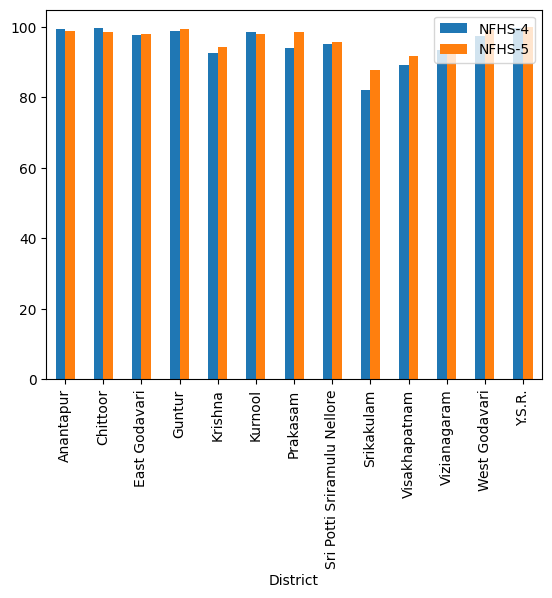

In [6]:
nfhs[nfhs['Indicator']=='8. Population living in households with an improved drinking-water source1 (%)'].plot(x="District", y=['NFHS-4','NFHS-5'], kind="bar")

# Sanitation facility improvement of Districts between 2015 to 2019

<Axes: xlabel='District'>

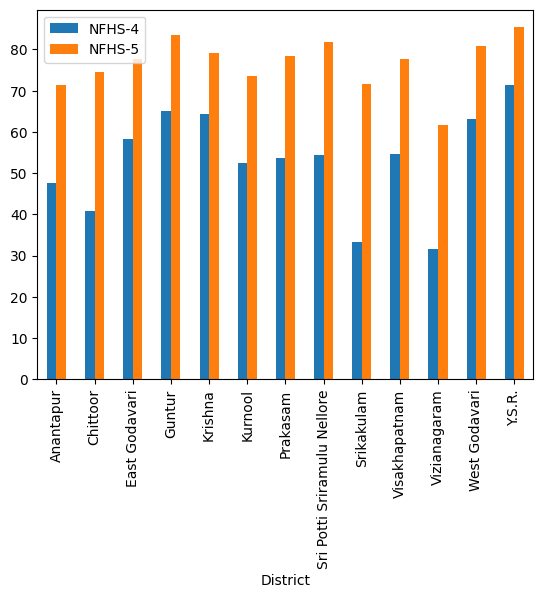

In [7]:
nfhs[nfhs['Indicator']=='9. Population living in households that use an improved sanitation facility2 (%)'].plot(x="District", y=['NFHS-4','NFHS-5'], kind="bar")

# Cooking Gas improvement of districts between 2015 to 2019

<Axes: xlabel='District'>

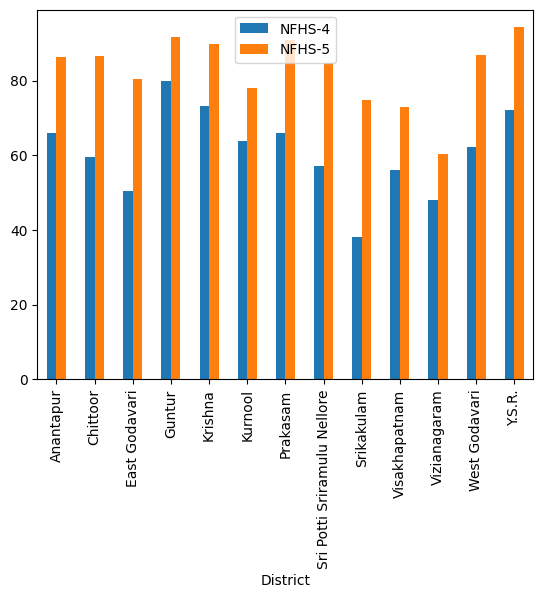

In [8]:
nfhs[nfhs['Indicator']=='10. Households using clean fuel for cooking3 (%)'].plot(x="District", y=['NFHS-4','NFHS-5'], kind="bar")

# Health insurance improvement between 2015 to 2019

<Axes: xlabel='District'>

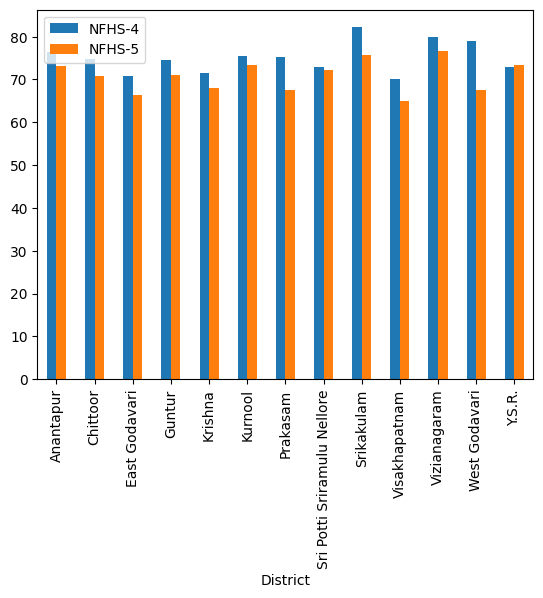

In [9]:
nfhs[nfhs['Indicator']=='12. Households with any usual member covered under a health insurance/financing scheme (%)'].plot(x="District", y=['NFHS-4','NFHS-5'], kind="bar")

In [10]:
nfhs_ind=nfhs[['District','Indicator','NFHS-4','NFHS-5']]

In [11]:
nfhs_trans=pd.DataFrame()
nfhs_diff=pd.DataFrame()
nfhs_trans['District']=nfhs_ind['District'].unique()
nfhs_diff['District']=nfhs_ind['District'].unique()
for i in range(len(nfhs_ind.Indicator.unique())):
    nfhs_trans=pd.merge(nfhs_ind[nfhs_ind['Indicator']==nfhs_ind.Indicator.unique()[i]],nfhs_trans,on='District',how='inner')
    nfhs_trans.rename(columns = {'NFHS-4':nfhs_ind.Indicator.unique()[i]+ ' NFHS-4', 'NFHS-5':nfhs_ind.Indicator.unique()[i]+ ' NFHS-5'}, inplace = True)
    del nfhs_trans['Indicator']
    if (len(nfhs_trans[nfhs_trans[nfhs_ind.Indicator.unique()[i]+ ' NFHS-4'].isnull()])==0) & (len(nfhs_trans[nfhs_trans[nfhs_ind.Indicator.unique()[i]+ ' NFHS-5'].isnull()])==0):
        nfhs_diff[nfhs_ind.Indicator.unique()[i]]=(nfhs_trans[nfhs_ind.Indicator.unique()[i]+ ' NFHS-5']-nfhs_trans[nfhs_ind.Indicator.unique()[i]+ ' NFHS-4'])

# NFHS-4 and 5 columns

In [12]:
nfhs_trans

District  \
0                     Anantapur   
1                      Chittoor   
2                 East Godavari   
3                        Guntur   
4                       Krishna   
5                       Kurnool   
6                      Prakasam   
7   Sri Potti Sriramulu Nellore   
8                    Srikakulam   
9                 Visakhapatnam   
10                 Vizianagaram   
11                West Godavari   
12                       Y.S.R.   

    104. Men age 15 years and above who consume alcohol (%) NFHS-4  \
0                                                 NaN                
1                                                 NaN                
2                                                 NaN                
3                                                 NaN                
4                                                 NaN                
5                                                 NaN                
6                                                 NaN                
7                                                 NaN                
8                                                 NaN                
9                                                 NaN                
10                                                NaN                
11                                                NaN                
12                                                NaN                

    104. Men age 15 years and above who consume alcohol (%) NFHS-5  \
0                                                16.8                
1                                                18.3                
2                                                25.9                
3                                                24.5                
4                                                22.8                
5                                                20.0                
6                                                19.0                
7                                                25.9                
8                                                28.3                
9                                                30.2                
10                                               32.3                
11                                               23.6                
12                                               16.0                

    103. Women age 15 years and above who consume alcohol (%) NFHS-4  \
0                                                 NaN                  
1                                                 NaN                  
2                                                 NaN                  
3                                                 NaN                  
4                                                 NaN                  
5                                                 NaN                  
6                                                 NaN                  
7                                                 NaN                  
8                                                 NaN                  
9                                                 NaN                  
10                                                NaN                  
11                                                NaN                  
12                                                NaN                  

    103. Women age 15 years and above who consume alcohol (%) NFHS-5  \
0                                                 0.6                  
1                                                 0.4                  
2                                                 0.7                  
3                                                 0.2                  
4                                                 0.4                  
5                                                 0.4                  
6                                                 0.3    

# Difference in percentage of each Indicator for NFHS-5 and NFHS-4 in percentage terms

In [13]:
nfhs_diff

District  \
0                     Anantapur   
1                      Chittoor   
2                 East Godavari   
3                        Guntur   
4                       Krishna   
5                       Kurnool   
6                      Prakasam   
7   Sri Potti Sriramulu Nellore   
8                    Srikakulam   
9                 Visakhapatnam   
10                 Vizianagaram   
11                West Godavari   
12                       Y.S.R.   

    1. Female population age 6 years and above who ever attended school (%)  \
0                                                 2.6                         
1                                                 0.6                         
2                                                 6.4                         
3                                                 4.6                         
4                                                 2.7                         
5                                                -1.4                         
6                                                 4.6                         
7                                                 7.3                         
8                                                 1.6                         
9                                                 5.5                         
10                                               -0.4                         
11                                                6.9                         
12                                                2.7                         

    2. Population below age 15 years (%)  \
0                                    0.3   
1                                   -0.8   
2                                   -1.3   
3                                   -0.6   
4                                   -1.7   
5                                   -3.5   
6                                   -1.9   
7                                   -2.1   
8                                   -1.5   
9                                   -1.9   
10                                  -3.1   
11                                  -1.5   
12                                  -0.5   

    3. Sex ratio of the total population (females per 1,000 males)  \
0                                                47.0                
1                                               -55.0                
2                                                68.0                
3                                                40.0                
4                                                27.0                
5                                                24.0                
6                                                -5.0                
7                                                10.0                
8                                               112.0                
9                                                19.0                
10                                               48.0                
11                                              -21.0                
12                                               24.0                

    4. Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
0                                              -315.0                                          
1                                              -149.0                                          
2                                              -126.0                                          
3                                               304.0                                          
4                                               239.0                                          
5                                               102.0                                          
6                                                38.0                                          
7                                              -145.0      

#Data Cleaning

In [14]:
pol_index=mpi_district

nfhs_diff['District'] = nfhs_diff['District'].str.lower()

nfhs_diff=nfhs_diff.replace(['sri potti sriramulu nellore','y.s.r.','visakhapatnam'], ['nellore','kadapa','vishakapatnam'])
pol_nfhs=pd.merge(pol_index,nfhs_diff,left_on='District_Name',right_on='District',how='inner')
pol_nfhs['MPI_Magnitude'] = ((pol_nfhs['MPI (NFHS-4)'] - pol_nfhs['MPI (NFHS-5)'])/pol_nfhs['MPI (NFHS-4)'])*100
pol_nfhs['Pol_Index_Magnitude'] = ((pol_nfhs['Index_2019'] - pol_nfhs['Index_2014'])/pol_nfhs['Index_2014'])*100
pol_nfhs[['District_Name', 'Index_2014', 'Index_2019','MPI (NFHS-4)','MPI (NFHS-5)','Pol_Index_Magnitude','MPI_Magnitude',
       'Index Political Difference','MPI Index DIfference',
       'Head Count Index Difference', 'Intensity (NFHS-4) Difference']]


District_Name  Index_2014  Index_2019  MPI (NFHS-4)  MPI (NFHS-5)  \
0       anantapur    0.500000    0.750000         0.052         0.027   
1        chittoor    0.571429    0.714286         0.041         0.022   
2   east godavari    0.578947    0.578947         0.035         0.027   
3          guntur    0.529412    0.529412         0.030         0.016   
4          kadapa    0.550000    0.900000         0.038         0.013   
5         krishna    0.500000    0.531250         0.036         0.017   
6         kurnool    0.357143    0.750000         0.090         0.054   
7         nellore    0.450000    0.550000         0.049         0.023   
8        prakasam    0.500000    0.583333         0.063         0.027   
9      srikakulam    0.650000    0.650000         0.058         0.022   
10  vishakapatnam    0.433333    0.700000         0.071         0.031   
11   vizianagaram    0.333333    0.722222         0.081         0.035   
12  west godavari    0.466667    0.766667         0.036         0.010   

    Pol_Index_Magnitude  MPI_Magnitude  Index Political Difference  \
0             50.000000      48.076923                    0.250000   
1             25.000000      46.341463                    0.142857   
2              0.000000      22.857143                    0.000000   
3              0.000000      46.666667                    0.000000   
4             63.636364      65.789474                    0.350000   
5              6.250000      52.777778                    0.031250   
6            110.000000      40.000000                    0.392857   
7             22.222222      53.061224                    0.100000   
8             16.666667      57.142857                    0.083333   
9              0.000000      62.068966                    0.000000   
10            61.538462      56.338028                    0.266667   
11           116.666667      56.790123                    0.388889   
12            64.285714      72.222222                    0.300000   

    MPI Index DIfference  Head Count Index Difference  \
0                 -0.025                      -0.0573   
1                 -0.019                      -0.0398   
2                 -0.008                      -0.0238   
3                 -0.014                      -0.0290   
4                 -0.025                      -0.0580   
5                 -0.019                      -0.0431   
6                 -0.036                      -0.0680   
7                 -0.026                      -0.0586   
8                 -0.036                      -0.0756   
9                 -0.036                      -0.0881   
10                -0.040                      -0.0750   
11                -0.046                      -0.1034   
12                -0.026                      -0.0669   

    Intensity (NFHS-4) Difference  
0                         -0.0144  
1                         -0.0345  
2                          0.0231  
3                         -0.0354  
4                         -0.0332  
5                         -0.0334  
6                         -0.0355  
7                         -0.0073  
8                         -0.0184  
9                          0.0027  
10                        -0.0618  
11                        -0.0222  
12                         0.0277

# Correlation between NFHS difference in percentage terms and political Index.

In [50]:
correlation_matrix_pearson=pol_nfhs.corr(method='pearson')

correlation_matrix_pearson=pd.DataFrame(correlation_matrix_pearson[(correlation_matrix_pearson>0.3)|(correlation_matrix_pearson<-0.3)])
correlation_matrix_pearson = correlation_matrix_pearson["Index Political Difference"].drop(["Index_2014","Index_2019","MPI_Magnitude","MPI (NFHS-5)","MPI (NFHS-4)","Headcount Ratio (NFHS-4)","Headcount Ratio (NFHS-5)","Pol_Index_Magnitude","Unnamed: 0","Intensity (NFHS-4)"])
pd.DataFrame(correlation_matrix_pearson).sort_values(by='Index Political Difference').dropna()

<ipython-input-50-68dd88d02b88>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Index Political Difference
MPI Index DIfference                                                 -0.560004
Head Count Index Difference                                          -0.508927
10. Households using clean fuel for cooking3 (%)                     -0.456501
72. Total children age 6-23 months receiving an...                   -0.442293
31. Current users ever told about side effects ...                   -0.427122
53. Children age 12-23 months who have received...                   -0.422095
8. Population living in households with an impr...                   -0.421777
44. Home births that were conducted by skilled ...                   -0.421534
57. Children age 12-23 months who have received...                   -0.409164
1. Female population age 6 years and above who ...                   -0.397434
61. Prevalence of diarrhoea in the 2 weeks prec...                   -0.361712
47. Births in a private health facility that we...                   -0.347702
46. Births delivered by caesarean section (%)                        -0.333255
2. Population below age 15 years (%)                                 -0.320049
26. Condom (%)                                                        0.316101
73. Children under 5 years who are stunted (hei...                    0.318492
58. Children age 9-35 months who received a vit...                    0.351196
76. Children under 5 years who are underweight ...                    0.412260
38. Mothers who received postnatal care from a ...                    0.477910
45. Births attended by skilled health personnel...                    0.510172
37. Registered pregnancies for which the mother...                    0.546866
43. Institutional births in public facility (%)                       0.606403
42. Institutional births (%)                                          0.624136
Index Political Difference                                            1.000000

<Axes: >

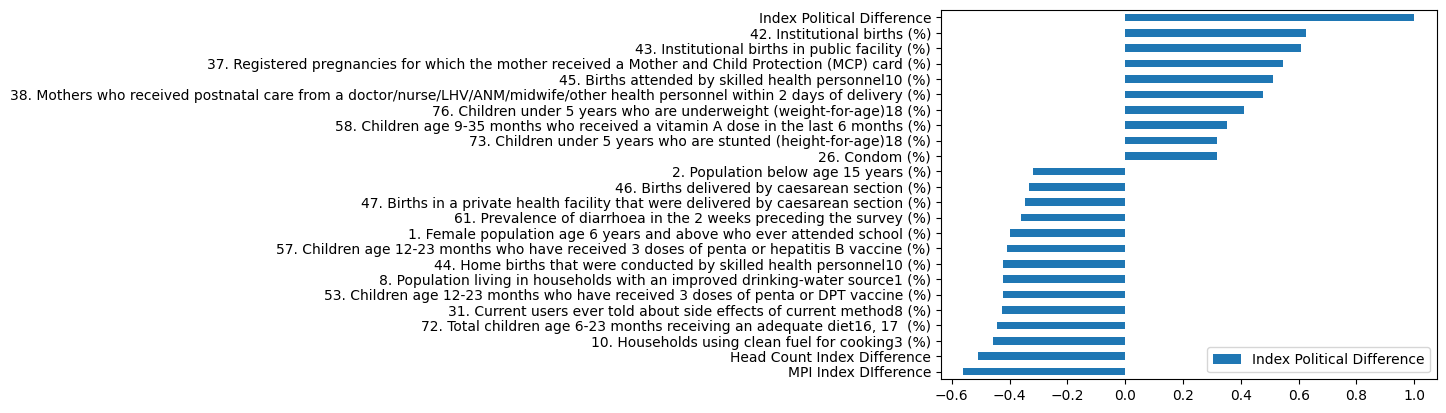

In [49]:
pd.DataFrame(correlation_matrix_pearson).sort_values(by='Index Political Difference').dropna().plot(kind='barh')

#Spearman Correlation

In [17]:
correlation_matrix_pearson=pol_nfhs.corr(method='spearman')
correlation_matrix_pearson=pd.DataFrame(correlation_matrix_pearson[(correlation_matrix_pearson>0.3)|(correlation_matrix_pearson<-0.3)])
pd.DataFrame(correlation_matrix_pearson['Index Political Difference'].dropna()).sort_values(by='Index Political Difference')

<ipython-input-17-53c06ba750e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson=pol_nfhs.corr(method='spearman')


Index Political Difference
Index_2014                                                           -0.688889
57. Children age 12-23 months who have received...                   -0.541445
MPI Index DIfference                                                 -0.538889
44. Home births that were conducted by skilled ...                   -0.480670
8. Population living in households with an impr...                   -0.473686
53. Children age 12-23 months who have received...                   -0.447521
Head Count Index Difference                                          -0.419896
10. Households using clean fuel for cooking3 (%)                     -0.414371
1. Female population age 6 years and above who ...                   -0.381221
72. Total children age 6-23 months receiving an...                   -0.375696
47. Births in a private health facility that we...                   -0.364646
31. Current users ever told about side effects ...                   -0.345784
2. Population below age 15 years (%)                                 -0.337486
46. Births delivered by caesarean section (%)                        -0.329187
3. Sex ratio of the total population (females p...                   -0.320888
Unnamed: 0                                                            0.303872
MPI (NFHS-5)                                                          0.308762
26. Condom (%)                                                        0.319889
Headcount Ratio (NFHS-5)                                              0.359122
73. Children under 5 years who are stunted (hei...                    0.362382
58. Children age 9-35 months who received a vit...                    0.364646
12. Households with any usual member covered un...                    0.398344
34. Mothers whose last birth was protected agai...                    0.425421
Intensity (NFHS-4)                                                    0.437072
37. Registered pregnancies for which the mother...                    0.497245
Headcount Ratio (NFHS-4)                                              0.558020
MPI (NFHS-4)                                                          0.558788
42. Institutional births (%)                                          0.569069
45. Births attended by skilled health personnel...                    0.613269
43. Institutional births in public facility (%)                       0.690618
Index_2019                                                            0.810519
Pol_Index_Magnitude                                                   0.988889
Index Political Difference                                            1.000000

#Kendall Correlation

In [18]:
correlation_matrix_pearson=pol_nfhs.corr(method='kendall')
correlation_matrix_pearson=pd.DataFrame(correlation_matrix_pearson[(correlation_matrix_pearson>0.3)|(correlation_matrix_pearson<-0.3)])
pd.DataFrame(correlation_matrix_pearson['Index Political Difference'].dropna()).sort_values(by='Index Political Difference')

<ipython-input-18-30dd1bfdcb60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson=pol_nfhs.corr(method='kendall')


Index Political Difference
Index_2014                                                           -0.560000
57. Children age 12-23 months who have received...                   -0.431455
44. Home births that were conducted by skilled ...                   -0.431455
MPI Index DIfference                                                 -0.426667
8. Population living in households with an impr...                   -0.357624
10. Households using clean fuel for cooking3 (%)                     -0.353009
Head Count Index Difference                                          -0.326860
53. Children age 12-23 months who have received...                   -0.326860
72. Total children age 6-23 months receiving an...                   -0.300711
Intensity (NFHS-4)                                                    0.315817
73. Children under 5 years who are stunted (hei...                    0.315817
34. Mothers whose last birth was protected agai...                    0.326860
37. Registered pregnancies for which the mother...                    0.326860
Headcount Ratio (NFHS-5)                                              0.353009
45. Births attended by skilled health personnel...                    0.405307
Headcount Ratio (NFHS-4)                                              0.431455
43. Institutional births in public facility (%)                       0.431455
MPI (NFHS-4)                                                          0.447407
42. Institutional births (%)                                          0.457604
Index_2019                                                            0.631634
Pol_Index_Magnitude                                                   0.946667
Index Political Difference                                            1.000000

In [19]:
correlation_matrix_pearson=pol_nfhs.corr(method='pearson')
correlation_matrix_pearson=pd.DataFrame(correlation_matrix_pearson[(correlation_matrix_pearson>0.3)|(correlation_matrix_pearson<-0.3)])
pd.DataFrame(correlation_matrix_pearson['Pol_Index_Magnitude'].dropna()).sort_values(by='Pol_Index_Magnitude')

<ipython-input-19-48e7df26c397>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson=pol_nfhs.corr(method='pearson')


Pol_Index_Magnitude
Index_2014                                                    -0.804793
MPI Index DIfference                                          -0.639398
Head Count Index Difference                                   -0.580256
10. Households using clean fuel for cooking3 (%)              -0.528373
44. Home births that were conducted by skilled ...            -0.516256
2. Population below age 15 years (%)                          -0.513128
1. Female population age 6 years and above who ...            -0.479460
31. Current users ever told about side effects ...            -0.426213
8. Population living in households with an impr...            -0.408071
72. Total children age 6-23 months receiving an...            -0.386755
57. Children age 12-23 months who have received...            -0.328994
53. Children age 12-23 months who have received...            -0.312975
Intensity (NFHS-4)                                             0.304879
58. Children age 9-35 months who received a vit...             0.308321
26. Condom (%)                                                 0.367062
73. Children under 5 years who are stunted (hei...             0.372361
Unnamed: 0                                                     0.378123
45. Births attended by skilled health personnel...             0.386269
38. Mothers who received postnatal care from a ...             0.389566
37. Registered pregnancies for which the mother...             0.467599
76. Children under 5 years who are underweight ...             0.511852
MPI (NFHS-5)                                                   0.550800
Headcount Ratio (NFHS-5)                                       0.572590
43. Institutional births in public facility (%)                0.581504
Index_2019                                                     0.684689
42. Institutional births (%)                                   0.686812
MPI (NFHS-4)                                                   0.688927
Headcount Ratio (NFHS-4)                                       0.706430
Index Political Difference                                     0.963481
Pol_Index_Magnitude                                            1.000000

#Index VS MPI

In [20]:
#pol_nfhs[['MPI Index DIfference','Index Political Difference']]
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Provided data

df = pd.DataFrame()
df['MPI Index Difference'] = pol_nfhs['MPI Index DIfference']
df['Index Political Difference'] = pol_nfhs['Index Political Difference']

# Linear regression
X = df['Index Political Difference'].values.reshape(-1,1)
y = df['MPI Index Difference'].values
reg = LinearRegression().fit(X, y)
predictions = reg.predict(X)

In [21]:
#px.scatter(pol_nfhs,x='Index Political Difference',y='MPI Index DIfference',color='District_Name')
import plotly.graph_objects as go
fig = px.scatter(df, x='Index Political Difference', y='MPI Index Difference', text=pol_nfhs['District_Name'])

# Add regression line to the plot
fig.add_trace(go.Scatter(x=df['Index Political Difference'], y=predictions, mode='lines', name='Regression Line', line=dict(color='red')))

# Update layout for better visualization
fig.update_layout(title="MPI Index Difference vs. Index Political Difference",
                  xaxis_title="Index Political Difference",
                  yaxis_title="MPI Index Difference",
                  showlegend=True)

fig.show()

#Index VS HC Ratio

In [22]:
#pol_nfhs[['MPI Index DIfference','Index Political Difference']]
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Provided data

df = pd.DataFrame()
df['Head Count Index Difference'] = pol_nfhs['Head Count Index Difference']
df['Index Political Difference'] = pol_nfhs['Index Political Difference']

# Linear regression
X = df['Index Political Difference'].values.reshape(-1,1)
y = df['Head Count Index Difference'].values
reg = LinearRegression().fit(X, y)
predictions = reg.predict(X)

In [23]:
#px.scatter(pol_nfhs,x='Index Political Difference',y='MPI Index DIfference',color='District_Name')
import plotly.graph_objects as go
fig = px.scatter(df, x='Index Political Difference', y='Head Count Index Difference', text=pol_nfhs['District_Name'])

# Add regression line to the plot
fig.add_trace(go.Scatter(x=df['Index Political Difference'], y=predictions, mode='lines', name='Regression Line', line=dict(color='red')))

# Update layout for better visualization
fig.update_layout(title="Head Count Difference vs. Index Political Difference",
                  xaxis_title="Index Political Difference",
                  yaxis_title="Head Count Index Difference",
                  showlegend=True)

fig.show()

#Index Vs Drinking water

In [24]:
px.line(pol_nfhs.sort_values(by='Index Political Difference'),x='Index Political Difference',y='8. Population living in households with an improved drinking-water source1 (%)')

#Index Vs Birth Insitutionalised

In [25]:
px.scatter(pol_nfhs,x='Index Political Difference',y='42. Institutional births (%)',color='District_Name')

#Index Vs Birth In Public Facility

In [26]:
px.scatter(pol_nfhs,x='Index Political Difference',y='43. Institutional births in public facility (%)',color='District_Name')

# Mapping Index Political Difference

In [27]:
import geopandas as gpd
import pyproj
# Importing the shape file of assembly-constituencies
fp = "/content/drive/My Drive/dataverse_files/maps-master/Districts/Census_2011"
map_df = gpd.read_file(fp)
map_df = map_df[map_df['ST_NM']=='Andhra Pradesh'][['DISTRICT','ST_NM','geometry']]

map_df.reset_index(drop=True,inplace=True)
map_df.dropna(inplace=True) # The 'None' type rows are removed
map_df.reset_index(drop=True,inplace=True) # index is reset


pol_nfhs['District_Name'] = pol_nfhs['District_Name'].apply(lambda x:x.lower())
map_df['DISTRICT'] = map_df['DISTRICT'].apply(lambda x:x.lower())

map_df['DISTRICT'] = map_df['DISTRICT'].replace({'visakhapatnam': 'vishakapatnam', 'y.s.r.': 'kadapa','sri potti sriramulu nellore':'nellore'})
merged = pd.merge(pol_nfhs,map_df,left_on=['District_Name'],right_on=['DISTRICT'],how='inner')

merged = merged.set_geometry("geometry").set_index("District_Name")
cdm={'0.0':'red','1.0':'Yellow','2.0':'Green'}
#cdm={'0.0':'red','1.0':'Yellow','2.0':'Green','3.0':'Orange'}
merged['Index Political Difference'] = merged['Index Political Difference'].astype('float')
fig = px.choropleth(np.round(merged['Index Political Difference'],1), geojson=merged.geometry, locations=merged.index, color="Index Political Difference",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [28]:
fig = px.choropleth(np.round(merged['Index Political Difference'],1), geojson=merged.geometry, locations=merged.index,color=merged.index)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

# MPI Index Difference Mapping

In [29]:
fig = px.choropleth(np.round(merged['MPI Index DIfference'],2), geojson=merged.geometry, locations=merged.index, color="MPI Index DIfference",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [30]:
fig = px.choropleth(np.round(merged['Head Count Index Difference'],2), geojson=merged.geometry, locations=merged.index, color="Head Count Index Difference",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [31]:
fig = px.choropleth(np.round(merged['MPI (NFHS-4)'],2), geojson=merged.geometry, locations=merged.index, color='MPI (NFHS-4)',color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [32]:
fig = px.choropleth(np.round(merged['MPI (NFHS-5)'],2), geojson=merged.geometry, locations=merged.index, color="MPI (NFHS-5)",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [33]:
fig = px.choropleth(np.round(merged['Headcount Ratio (NFHS-4)'],2), geojson=merged.geometry, locations=merged.index, color="Headcount Ratio (NFHS-4)",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [34]:
fig = px.choropleth(np.round(merged['Headcount Ratio (NFHS-5)'],2), geojson=merged.geometry, locations=merged.index, color="Headcount Ratio (NFHS-5)",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

# Index 2014 Mapping

In [35]:
fig = px.choropleth(np.round(merged['Index_2014'],1), geojson=merged.geometry, locations=merged.index, color="Index_2014",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

# Index 2019 Mapping

In [36]:
fig = px.choropleth(np.round(merged['Index_2019'],1), geojson=merged.geometry, locations=merged.index, color="Index_2019",color_discrete_map=cdm)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()